In [79]:
import geopandas as gpd
import pyvista as pv
import pyvistaqt as pyqt
import gemgis as gg
from sklearn.ensemble import RandomForestClassifier
import verde as vd
import numpy as np
import warnings
from pyproj import CRS, Transformer

import plotly.express as px
warnings.filterwarnings('ignore')

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
sns.set(rc={'axes.labelcolor':'black', 'xtick.color':'black', 'ytick.color':'black'})
# sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})


In [81]:
#Plot the grid and the original data points

def plot_depth(title, grid,original_df, my_cmap, colorbar_label, vmin, vmax):
    plt.figure(figsize=(10,10))
    # plt.title(title)
    ax = plt.axes()
    ax.set_title(title)
    # ax.plot(*coordinates, ".k", markersize=1)
    
    tmp = grid.plot.pcolormesh(
        ax=ax, cmap=my_cmap, add_colorbar=False, vmin=vmin, vmax=vmax
    )
    plt.colorbar(tmp).set_label(colorbar_label)
    pts = plt.scatter(original_df.E, original_df.N, c=original_df.MOLASSE, s=80, edgecolor='#ffffff66', vmin=vmin, vmax=vmax, cmap=my_cmap)
    # Use an utility function to add tick labels and land and ocean features to the map.
    # vd.datasets.setup_texas_wind_map(ax, region=region)
    plt.title(title)
    return plt.show()

A tutorial for fetching data from opendata.swiss API is available here  https://www.datacareer.ch/blog/fetching-data-from-the-opendata-swiss-api-a-short-tutorial-in-python/. SITG files are stored into .zip packages and to fetch them it requires an alternative approach. Often there are several ´.csv´ inside a zip and the following snippet code allow to store all ´.csv´ as pd.DataFrame in a dictionary.



In [82]:
from zipfile import ZipFile
import urllib.request
from io import BytesIO
# zip_file = ZipFile(urllib.request.urlopen((data_url).read()))
data_url = 'https://ge.ch/sitg/geodata/SITG/OPENDATA/4108/CSV_GOL_SONDAGE.zip'
# data_url = 'https://ge.ch/sitg/geodata/SITG/OPENDATA/4108/SHP_FFP_REG04_BLEU_LIGNE.zip'

zip_file = ZipFile(BytesIO(urllib.request.urlopen(data_url).read()))

dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename),           encoding='ISO-8859-1', 
sep=';',)
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv')}

for key, values in dfs.items():
    print(key)

GOL_SONDAGE.csv


In [83]:
# sondage = dfs['GOL_SONDAGE.csv']
# sondage.info()
# sondage.plot(kind='scatter', x= 'E', y='N')
# sondage_clean = sondage.dropna(subset=['MOLASSE','ALLUV_ANC','RISS'])


In [84]:
# coordinates = (df.E.values, df.N.values)
# region = vd.get_region(coordinates)
# region

In [85]:
# sondage_clean.plot(kind='scatter', x= 'E', y='N')


In [86]:
# sns.distplot(sondage_clean['MOLASSE'])

In [87]:
# reducer_center = vd.BlockReduce(
#     reduction=np.median, spacing=200, center_coordinates=True
# )
# coordinates_center, ( MOLASSE, PROFONDEUR, HTN)  = reducer_center.filter(
#     coordinates=(sondage_clean.E, sondage_clean.N), data=( sondage_clean.MOLASSE, sondage_clean.PROFONDEUR, sondage_clean.HTN)
# )

# plt.figure(figsize=(7, 7))
# plt.plot(*coordinates_center, ".k",)
# plt.show()

In [88]:
# df = pd.DataFrame({'E':coordinates_center[0],'N':coordinates_center[1],'MOLASSE':MOLASSE, 'PROFONDEUR':PROFONDEUR, 'ALTITUDE':HTN})
# df.info()

In [89]:
# df['MOLASSE'] = df.MOLASSE *-1
# df['PROFONDEUR'] = df.PROFONDEUR *-1


In [90]:
# coordinates = (df.E.values, df.N.values)
# region = vd.get_region(coordinates)
# region_small = [2495000, 2495000+6000, 1116000, 1116000+6000]
# df_small = df[vd.inside((df.E,df.N), region_small)]
# df_small.info()
# plt.figure(figsize=(7, 7))

# plt.plot(df_small.E, df_small.N,".r" )

# plt.show()

In [91]:
# crs_4326 = CRS.from_epsg(4326)
# crs_2056 = CRS.from_epsg(2056)
# transformer = Transformer.from_crs(crs_2056, crs_4326)
# df['lat'], df['lon'] = transformer.transform(df.E,df.N)
# df.head()

In [92]:
# df.info()
# df.to_csv('../data/sondage_clean.csv', index=False)

The data set is part of the public dataset of GESDEC (Canton of Geneva) available at https://ge.ch/sitg/fiche/4108

In [93]:
df = pd.read_csv('../data/sondage_clean.csv')
df.describe()

,E,N,MOLASSE,PROFONDEUR,ALTITUDE,lat,lon
count,63.00,63.00,63.00,63.00,63.00,63.00,63.00
mean,2498157.31,1119250.34,-367.32,-111.58,417.63,46.22,6.12
std,1524.51,1724.57,37.88,92.05,24.36,0.02,0.02
min,2495176.14,1116172.65,-445.21,-300.00,370.14,46.19,6.08
25%,2496777.96,1117966.12,-387.50,-170.00,402.39,46.21,6.10
50%,2498580.01,1118962.50,-358.71,-70.70,418.07,46.21,6.12
75%,2499180.70,1120855.60,-348.60,-36.75,433.43,46.23,6.13
max,2500782.52,1121951.61,-286.00,-9.10,464.95,46.24,6.15


In [94]:
fig = px.scatter_mapbox(df, lat="lat", lon="lon", color="MOLASSE", size="ALTITUDE",
                  color_continuous_scale='earth', size_max=10, zoom=11,)

fig.update_layout(margin=dict(l=75, r=20, t=10, b=20),
mapbox = dict(style = "https://api.maptiler.com/maps/ch-swisstopo-lbm-grey/style.json?key=Y0QFvc1p5eTvlCMj4GEX",zoom= 11.8,center= {"lon": 6.115, "lat": 46.215},),)
fig.show()

In [95]:
distance = vd.median_distance((df.E, df.N))
min(distance)

199.27456896519288

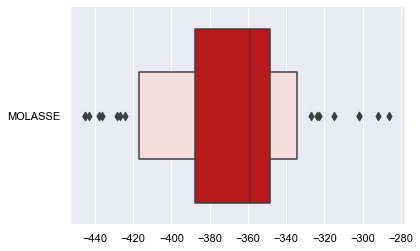

In [96]:
# Create an array with the colors you want to use
colors = ["#d00000"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

sns.boxenplot(data=df[["MOLASSE"]], orient='h', order=['MOLASSE'])
sns.despine(top=True, left=False)

The range of the Molasse depth is between -280 to -400 m under the surface.

### Data analytics and visualization

Lets define grid and the limits for plotting

In [97]:
coordinates = (df.E.values, df.N.values)
region = vd.get_region(coordinates)
region = (2495000, 2495000+6000, 1116000,1116000+6000)

spacing = 50

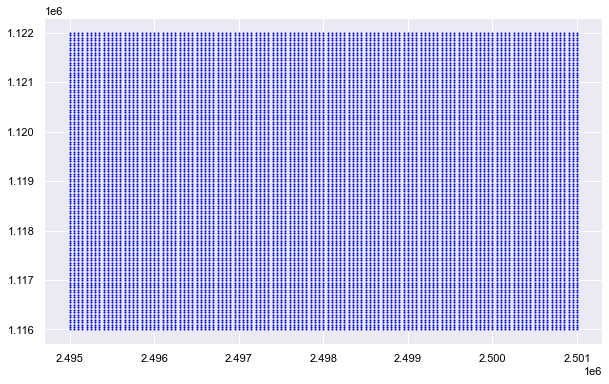

In [98]:
grid_E = vd.grid_coordinates(region=region,spacing=spacing)[0]
grid_N = vd.grid_coordinates(region=region,spacing=spacing)[1]
plt.figure(figsize=(10,6))
plt.scatter(grid_E, grid_N, s=1, color='blue')

### Nearest-neighbor interpolation using Verde

Let's make a very simple  interpolation  using a nearest-neighbor algorithm

In [99]:
chain = vd.Chain(
    [
        ("mean", vd.BlockReduce(np.mean, spacing=spacing )),
        ("spline", vd.ScipyGridder(method="nearest")),
    ]
)

train, test = vd.train_test_split(
    coordinates,df.MOLASSE, random_state=0
)

chain.fit(*train)

score = chain.score(*test)
print("\nScore: {:.3f}".format(score))

grid = chain.grid(
    region=region,
    spacing=spacing,
    # projection=projection,
    dims=["N", "E"],
    data_names="MOLASSE",
)


Score: 0.077


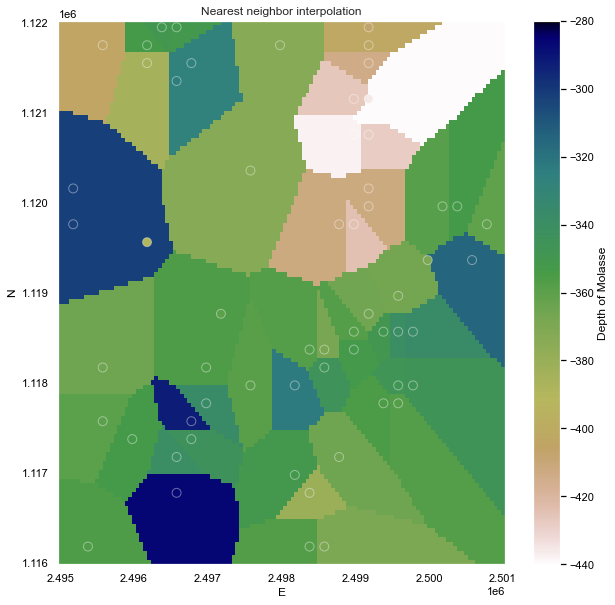

In [100]:
plot_depth('Nearest neighbor interpolation', grid.MOLASSE,df, 'gist_earth_r', 'Depth of Molasse', -440, -280)

### Biharmonic Spline interpolation using Verde 

Let's make a very simple  interpolation  using a biharmonic algorithm

In [68]:
spline = vd.Spline()
score_default = np.mean(
    vd.cross_val_score(spline, coordinates, df.MOLASSE)
)
spline.fit(coordinates, df.MOLASSE)
print("R² with defaults:", score_default)

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


R² with defaults: 0.18379525083542872


In [101]:
chain = vd.Chain(
    [
        ("mean", vd.BlockReduce(np.mean, spacing=spacing )),
        # ("spline", vd.Spline(damping=5e-2, mindist=1e2)),
        ("spline", vd.Spline()),

    ]
)

chain.fit(coordinates, df.MOLASSE)


grid = chain.grid(
    region=region,
    spacing=spacing,
    # projection=projection,
    dims=["N", "E"],
    data_names="MOLASSE",
)

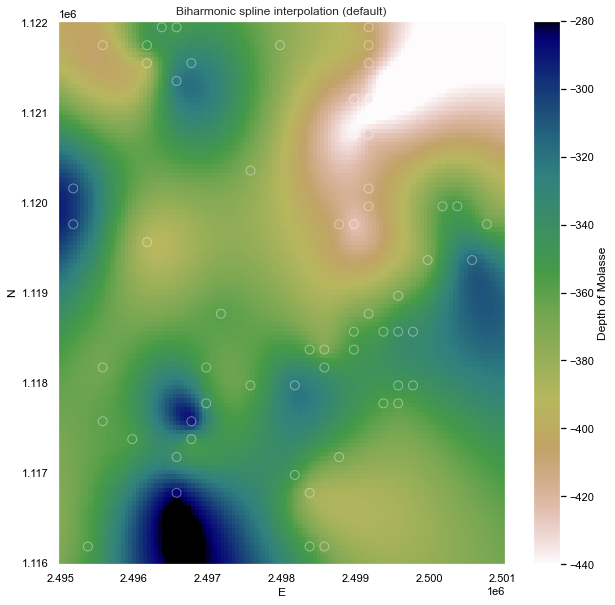

In [102]:
plot_depth('Biharmonic spline interpolation (default)', grid.MOLASSE,df, 'gist_earth_r', 'Depth of Molasse', -440, -280)


### Biharmonic Spline interpolation using Verde (CV) 

Let's make a very simple  interpolation  using a biharmonic algorithm

In [71]:
dampings = [None, 1e-4, 1e-3, 1e-2]
mindists = [1e-5, 1, 100, 1000, 1000]

spline = vd.SplineCV(
    dampings=dampings,
    mindists=mindists,
)
spline.fit(coordinates, df.MOLASSE)
print("Highest score:", spline.scores_.max())
print("Best damping:", spline.damping_)
print("Best mindist:", spline.mindist_)

Highest score: 0.4725352883539692
Best damping: 0.01
Best mindist: 1000


In [108]:
chain = vd.Chain(
    [
        ("mean", vd.BlockReduce(np.mean, spacing=spacing )),
        ("spline", vd.Spline(damping=spline.damping_, mindist=spline.mindist_)),

    ]
)

chain.fit(coordinates,df.MOLASSE)

grid = chain.grid(
    region=region,
    spacing=spacing,
    # projection=projection,
    dims=["N", "E"],
    data_names="MOLASSE",
)

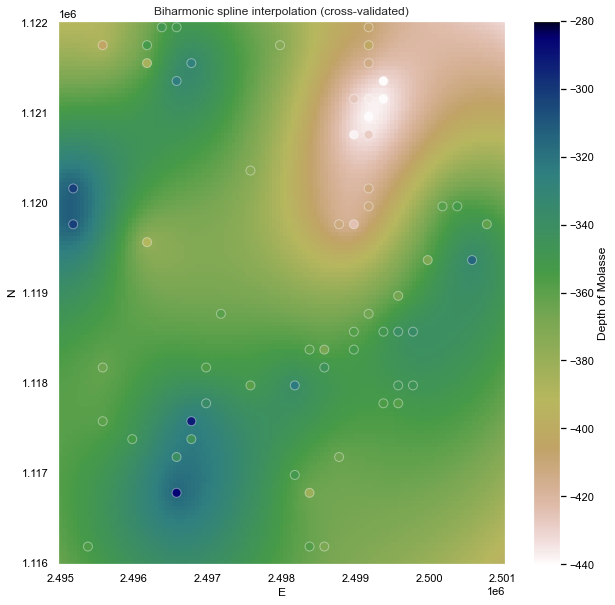

In [109]:
plot_depth('Biharmonic spline interpolation (cross-validated)', grid.MOLASSE,df, 'gist_earth_r', 'Depth of Molasse', -440, -280)

## Gaussian process

Gaussian Processes (GP) are a generic supervised learning method designed to solve regression and probabilistic classification problems.

The advantages of Gaussian processes are:

- The prediction interpolates the observations (at least for regular kernels).
- The prediction is probabilistic (Gaussian) so that one can compute empirical confidence intervals and decide based on those if one should refit (online fitting, adaptive fitting) the prediction in some region of interest.
- Versatile: different kernels can be specified. Common kernels are provided, but it is also possible to specify custom kernels.

In [74]:
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import Matern, RBF, ConstantKernel as C

# kernel = RBF(length_scale=100)
kernel = C(50.0) * RBF([50 ,50])


gp = GPR(normalize_y=True, alpha=0.5, kernel=kernel,)

gp.fit(df[['E', 'N']].values, df.MOLASSE.values)

GaussianProcessRegressor(alpha=0.5, kernel=7.07**2 * RBF(length_scale=[50, 50]),
                         normalize_y=True)

In [75]:
X_grid = np.stack([grid_E.ravel(), grid_N.ravel()]).T
y_grid = gp.predict(X_grid).reshape(grid_E.shape)

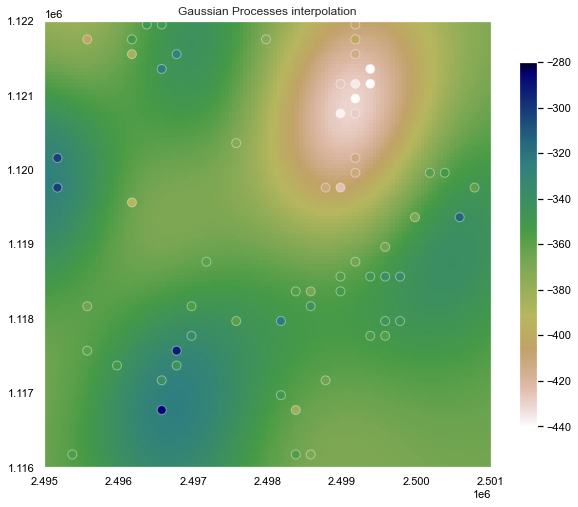

In [77]:

# mi = np.min(np.hstack([y_grid.ravel(), df.MOLASSE.values]))
# ma = np.max(np.hstack([y_grid.ravel(), df.MOLASSE.values]))
mi=-440
ma=-280

# Plot it all.
plt.figure(figsize=(10,10))
im = plt.imshow(y_grid, origin='lower', extent=region, vmin=mi, vmax=ma, cmap='gist_earth_r')
pts = plt.scatter(df.E, df.N, c=df.MOLASSE, s=80, edgecolor='#ffffff66', vmin=mi, vmax=ma, cmap='gist_earth_r')
plt.colorbar(im, shrink=0.67)
plt.title('Gaussian Processes interpolation')
plt.grid(False)
plt.show()


### VTK/pyvista visualization

In [ ]:
# np.save('../data/grid_E.npy', grid_E)
# np.save('../data/grid_N.npy', grid_N)

In [104]:
grid.MOLASSE.shape

(121, 121)

In [110]:
mesh = pv.StructuredGrid()
mesh.points = np.array([grid_E.ravel(), grid_N.ravel(), grid.MOLASSE.values.ravel()]).T
# mesh
mesh.dimensions =  [grid.MOLASSE.shape[1], grid.MOLASSE.shape[0], 1]
mesh["Elevation"] = grid.MOLASSE.values.ravel()
# mesh['ALLUV_ANC_verde'] = grid.ALLUV_ANC.values.ravel()
mesh_warped = mesh.warp_by_scalar(factor=5)
mesh_warped.save('../data/Spline_CV.vtk')
# mesh["Elevation"].warp_by_scalar(factor=500)
# subset  = mesh.extract_subset((100,150, 100,150, 0,0))

import pyvistaqt as pvqt
p = pvqt.BackgroundPlotter()

p.add_mesh(mesh_warped, cmap='gist_earth_r',show_edges=False)
# p.add_mesh(mesh1, cmap='gist_earth',show_edges=False)
p.show_bounds(grid=True, location='front')
p.show_grid()

<vtkmodules.vtkRenderingAnnotation.vtkCubeAxesActor(0x7f81f7849600) at 0x151025280>

In [ ]:
points = pv.PolyData(df[['E','N','MOLASSE']].values)
points['Elevation'] = df.MOLASSE.values
points1 = points.warp_by_scalar(factor=5)
points1.save('../data/sondage.vtk')